In [1]:
from data.datahandler import datahandler
from data.datareader import datareader
from models.QCNN import *
from utils import test_loader
from utils.plotter import *
from utils.converter import convert_labels_mapper

import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np
import os

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Load processed dataset

Instructions
1. the dataset should be placed in the working directory, specifically in the **datasets** folder.
2. the dataset should be already divided into classes, one-subfolder for earch classes. The folder/class name will be used to encode the label

If this script is runned after *Quantum Convolution Processing.ipynb* the folder structure should be alredy ready.

```
QuantumCNN
│   README.md
│   requirements.txt    
│
└───circuits
└───...
└───datasets
    └───EuroSAT
        └───Highway
                highway1.jpg
                highway2.jpg                
        └─── ....
        └───Lake
                lake1.jpg
                lake2.jpg                

```

Given *the dataset_name*, that must be the same of the folder, the **datahandler** will take care of loading the paths of the feature smaps and collected them into a class dictionary. After a report of the dataset will be printed.

In [2]:
dataset_name = 'EuroSAT'
root = os.path.join('datasets', dataset_name)
dhandler = datahandler(root)
dhandler.print_report(name=dataset_name)


Dataset EuroSAT

Class 0 - Forest                    - #images: 3000
Class 1 - River                     - #images: 2500
Class 2 - Highway                   - #images: 2500
Class 3 - AnnualCrop                - #images: 3000
Class 4 - SeaLake                   - #images: 3000
Class 5 - HerbaceousVegetation      - #images: 3000
Class 6 - Industrial                - #images: 2500
Class 7 - Residential               - #images: 3000
Class 8 - PermanentCrop             - #images: 2500
Class 9 - Pasture                   - #images: 2000


In [3]:
train_set, val_set = dhandler.split(None, factor=0.01)
dhandler.print_report(train_set, name=dataset_name+'-Train')
dhandler.print_report(val_set,   name=dataset_name+'-Validation')


Dataset EuroSAT-Train

Class 0 - Forest                    - #images: 2970
Class 1 - River                     - #images: 2475
Class 2 - Highway                   - #images: 2475
Class 3 - AnnualCrop                - #images: 2970
Class 4 - SeaLake                   - #images: 2970
Class 5 - HerbaceousVegetation      - #images: 2970
Class 6 - Industrial                - #images: 2475
Class 7 - Residential               - #images: 2970
Class 8 - PermanentCrop             - #images: 2475
Class 9 - Pasture                   - #images: 1980

Dataset EuroSAT-Validation

Class 0 - Forest                    - #images: 30
Class 1 - River                     - #images: 25
Class 2 - Highway                   - #images: 25
Class 3 - AnnualCrop                - #images: 30
Class 4 - SeaLake                   - #images: 30
Class 5 - HerbaceousVegetation      - #images: 30
Class 6 - Industrial                - #images: 25
Class 7 - Residential               - #images: 30
Class 8 - PermanentCrop    

The **unpack** function trasforms the dataset from a dictionary to an array. It assigns also the label to each image and returns a dictionary mapping the labels with the class name

In [4]:
labels_mapper, x_t, y_t = dhandler.unpack(train_set)
labels_mapper, x_v, y_v = dhandler.unpack(val_set)

print('Train Set')
print('\nLabels')
for key in labels_mapper: print('{:<30s}{}'.format(key,labels_mapper[key]))

print('\nDataset Size')
print('{:<30s}{}'.format('Images', len(x_t)))

print('\nTraining Dataset samples')
print('{:<30s}{}'.format('X Train', x_t[0]))
print('{:<30s}{}'.format('X Train', y_t[0]))

print('\nValidation Set')
print('\nLabels')
for key in labels_mapper: print('{:<30s}{}'.format(key,labels_mapper[key]))

print('\nDataset Size')
print('{:<30s}{}'.format('Images', len(x_v)))

print('\nTraining Dataset samples')
print('{:<30s}{}'.format('X Train', x_v[0]))
print('{:<30s}{}'.format('X Train', y_v[0]))

Train Set

Labels
Forest                        [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
River                         [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Highway                       [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
AnnualCrop                    [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
SeaLake                       [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
HerbaceousVegetation          [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Industrial                    [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Residential                   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
PermanentCrop                 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Pasture                       [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

Dataset Size
Images                        26730

Training Dataset samples
X Train                       datasets/EuroSAT/Forest/Forest_864.jpg
X Train                       [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Validation Set

Labels
Forest                        [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
River                         [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Highway

Test the keras-like data loader. In this specific case the *datareader.generatorv2* is tested. It contains all the rutines to load images batch by batch (1 in this case).

Reading Image:   0%|          | 0/26730 [00:00<?, ?it/s]

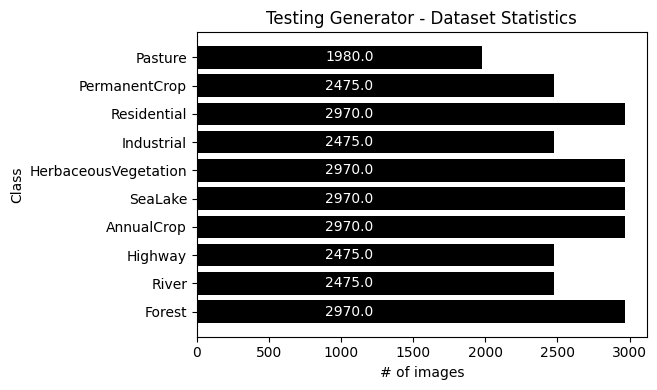

In [5]:
classes = dhandler.paths.keys()
loader  = datareader.generatorv2((x_t, y_t), (31,31,16))
test_loader.dlv2([x_t,y_t], loader, classes)

Reading Image:   0%|          | 0/270 [00:00<?, ?it/s]

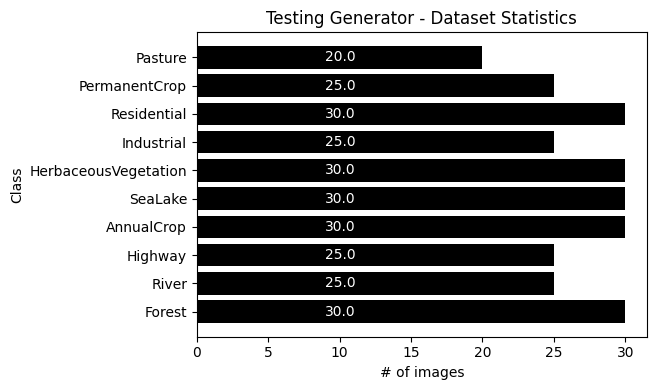

In [6]:
loader  = datareader.generatorv2((x_v, y_v), (31,31,16))
test_loader.dlv2([x_v,y_v], loader, classes)

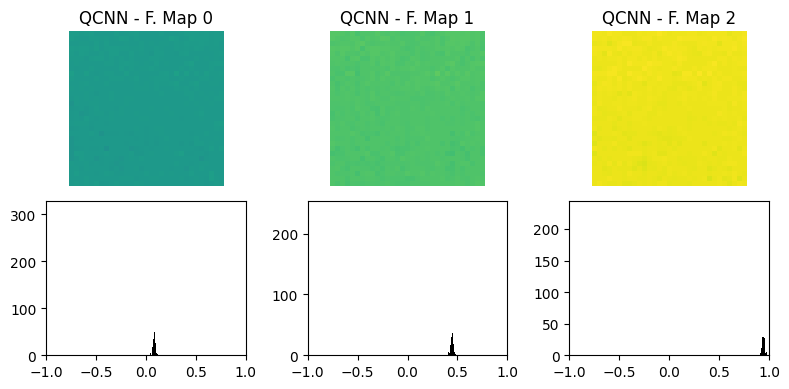

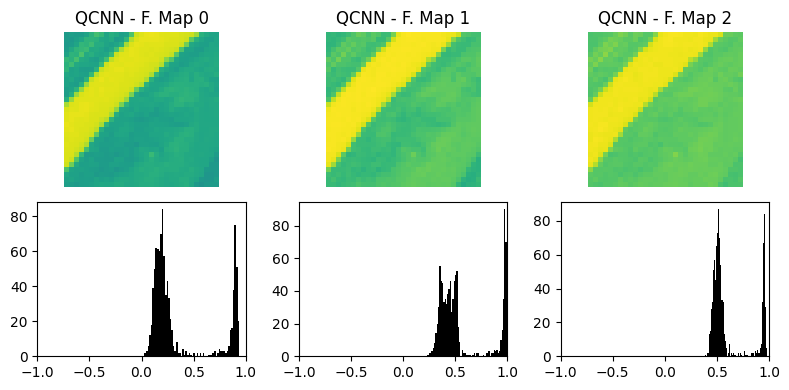

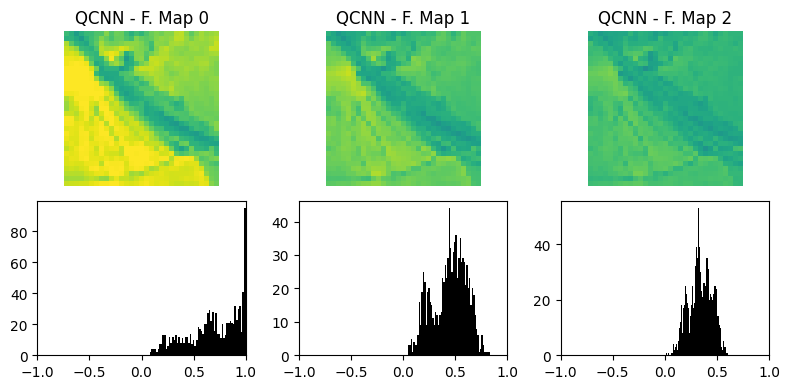

In [7]:
gen = iter(datareader.generator((x_t, y_t), 1, (31,31,3), normalize='true'))
for i in range(3):
    (xi, yi) = next(gen)
    feat_maps = xi[0]
    plot_features_map(feat_maps)

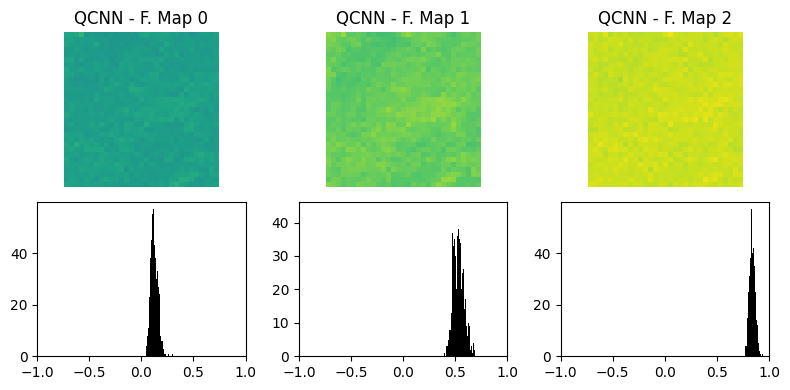

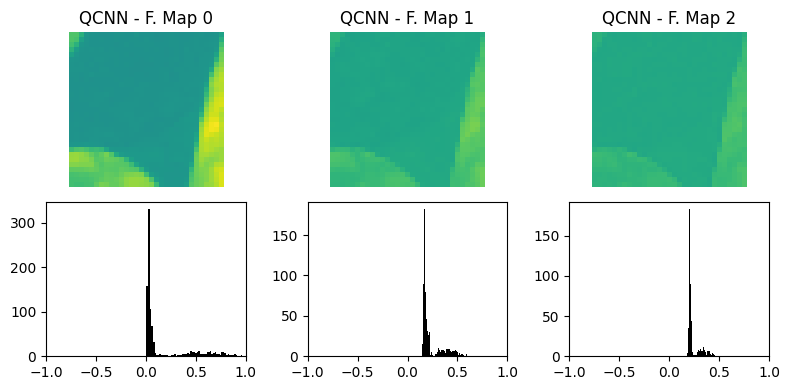

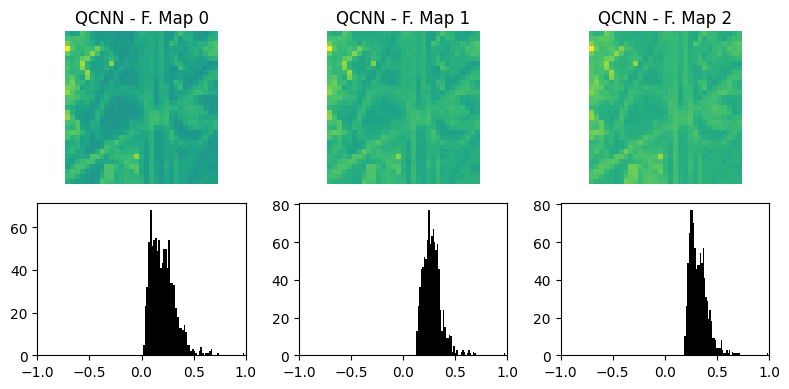

In [8]:
gen = iter(datareader.generator((x_v, y_v), 1, (31,31,3), normalize='true'))
for i in range(3):
    (xi, yi) = next(gen)
    feat_maps = xi[0]
    plot_features_map(feat_maps)

## Hybrid Model

In [ ]:
from importlib import reload 
from models import QCNN
reload(QCNN)

qcnn = QCNNv1(img_shape = (31,31,3), n_classes = 10)

In [ ]:
qcnn.model.summary()

In [ ]:
qcnn.train_test([x_v, y_v], [x_v, y_v], convert_labels_mapper(labels_mapper), normalize = None)

In [ ]:
from importlib import reload 
from utils import plotter
reload(plotter)

plotter.plot_training('QCNNv1', display = False)

# If the dataset has been processed with a different circuit for each class

In [9]:
from data.datahandler import datahandler
from data.datareader import datareader
from circuits.random import ry_random
from layers.QConv3D import QConv3D
from layers.QConv2D import QConv2D
from utils import test_loader
from utils.plotter import *

import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pennylane as qml
import numpy as np
import os

In [10]:
QUBITS      = 9
KERNEL_SIZE = 3
FILTERS     = 8
N_LAYERS    = 1
STRIDE      = 1
NUM_JOBS    = 8

circuits = []
for i in range(10):
    SEED        = i
    np.random.seed(SEED)
    circuits.append(ry_random(QUBITS, KERNEL_SIZE, FILTERS, N_LAYERS, SEED))

In [11]:
for i, circuit in enumerate(circuits):
    print('{:.^100}\n'.format(' Circuit '+str(i)+' '))
    
    drawer = qml.draw(circuit, expansion_strategy="device")
    print(drawer(np.random.rand(QUBITS)), '\n')

............................................ Circuit 0 .............................................

0: ──RY(1.09)──RZ(4.06)─────────────────────┤  <Z>
1: ──RY(0.52)──RZ(2.75)─────────────────────┤  <Z>
2: ──RY(2.76)──RY(3.45)──RY(3.79)───────────┤  <Z>
3: ──RY(2.99)──RX(3.42)──RX(2.66)──RY(6.05)─┤  <Z>
4: ──RY(0.12)──RX(5.60)─────────────────────┤  <Z>
5: ──RY(2.20)───────────╭●────────╭●────────┤  <Z>
6: ──RY(1.80)──RZ(4.49)─│─────────╰X────────┤  <Z>
7: ──RY(2.82)───────────╰X──────────────────┤  <Z>
8: ──RY(2.10)───────────────────────────────┤      

............................................ Circuit 1 .............................................

0: ──RY(1.47)─────────────────────────────────────╭X─────────────────────┤  <Z>
1: ──RY(3.07)─────────────────────────────────────│──────────────────────┤  <Z>
2: ──RY(1.90)──RX(2.62)──────────────╭X───────────│──╭●──────────────────┤  <Z>
3: ──RY(2.32)───────────╭X──RY(0.00)─│──╭X────────│──│───────────────────┤  <Z>
4: ──RY(0.12)──

In [12]:
conv1 = QConv2D(
    circuits,
    FILTERS, 
    KERNEL_SIZE, 
    STRIDE, 
    NUM_JOBS
)

In [13]:
image, label = next(iter(iter(datareader.generator((x_v, y_v), 1, (64,64,3), normalize='true'))))

out = conv1.apply(image[0,...])
out2 = np.shape(np.array_split(out, 10, axis = -1))

In [20]:
from tensorflow.keras.models import load_model
model = load_model('')

In [ ]:
pred = model.predict(out2)